In [1]:
from segmentizer import Segmentizer

In [2]:
from lasiesta_dataloader import LASIESTADataLoader

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
# from tqdm import tqdm_notebook, tnrange
from IPython.display import clear_output
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
from multiprocessing import Pool

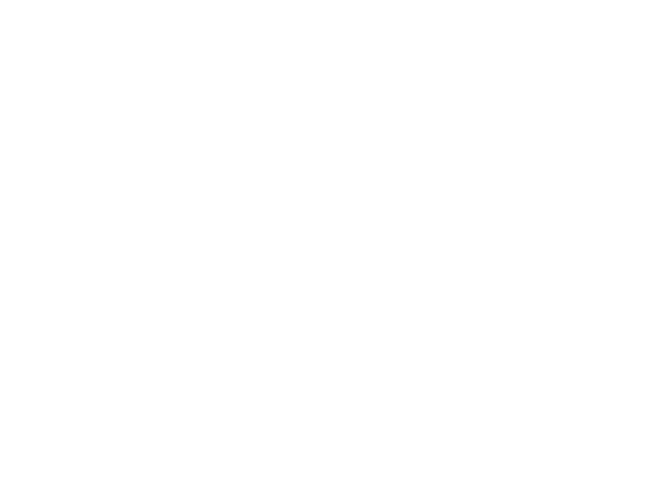

In [5]:
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.axis('off')
    
def background_to_image(background):
    rgb_background = []
    for row in background:
        rgb_row = []
        for val in row:
            if val is True:
                rgb_row.append([255,255,255])
            else:
                rgb_row.append([0,0,0])
                
        rgb_background.append(rgb_row)
    
    return rgb_background
    
def _animate(i):
    
    clear_output(wait=True)
    print('Frame: ' + str(i))
    
    fig.clf()

    frame = data_loader.get_next_frame()
    segmented_frame = segmentizer.fit_and_predict(frame)
    segmented_frame = background_to_image(segmented_frame)

    im = plt.imshow(segmented_frame, animated=True, aspect='auto')
    
    return im,

def render_video(data_loader, frames=None, output_file="result.mp4", fps=20):

    data_loader.set_next_frame_idx(0)

    # Mở tệp video để viết (FourCC là mã hiệu ứng video)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, fps, (1280, 720))

    if frames is None:
        num_frames = data_loader.get_nr_of_frames()
    else:
        num_frames = frames

    for i in range(num_frames):
        frame = data_loader.get_next_frame()
        out.write(frame)

    out.release()
    print("Finished rendering video")

Frame: 59


ValueError: unknown file extension: .mp4

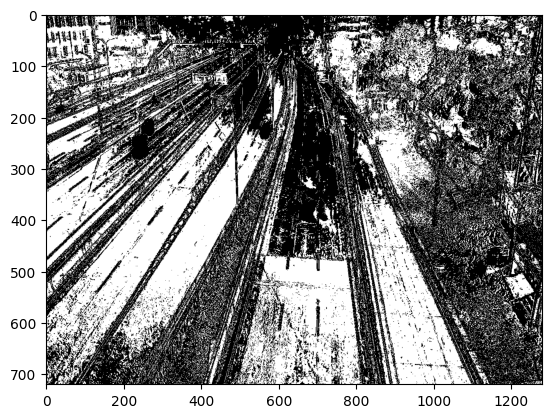

In [7]:
data_loader = LASIESTADataLoader("./images")
segmentizer = Segmentizer(1280, 720)
render_video(data_loader)